In [1]:
# utilities
import re
import pandas as pd

# plotting
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
df = pd.read_csv("genshin.csv")


df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  103 non-null    object
 1   text        103 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [3]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [4]:
def preprocess(textdata, stopwords_id, emojis):
    processedText = []

    wordLemm = WordNetLemmatizer()

    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = '@[^\s]+'
    alphaPattern = "[^a-zA-Z0-9]"
    sequencePattern = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        tweet = re.sub(urlPattern, ' ', tweet)
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "" + emojis[emoji])
        tweet = re.sub(userPattern, '', tweet)
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if word not in stopwords_id:
                if len(word) > 1:
                    word = wordLemm.lemmatize(word)
                    tweetwords += (word + ' ')

        processedText.append(tweetwords)

    return processedText

def tokenizingText(
    text,
):  # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text


def filteringText(text):  # Remove stopwors in a text
    listStopwords = set(stopwords.words("indonesian"))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text


def toSentence(list_words):  # Convert list of words into sentence
    sentence = " ".join(word for word in list_words)
    return sentence

In [5]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

nltk_stw_id = stopwords.words('indonesian')

# # Preprocessing df data

df['text_clean'] = preprocess(df['text'], nltk_stw_id, emojis)

df["text_preprocessed"] = df["text_clean"].apply(tokenizingText)
df["text_preprocessed"] = df["text_preprocessed"].apply(filteringText)

df.drop(["text"], axis=1, inplace=True)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,created_at,text_clean,text_preprocessed
0,9/30/2024 23:59,genshin impact versi hadir oktober 2024,"[genshin, impact, versi, hadir, oktober, 2024]"
1,9/30/2024 23:58,hii weekend yg art market mampir table 41 ya f...,"[hii, weekend, yg, art, market, mampir, table,..."
2,9/30/2024 23:53,41 kesini ga ya,"[41, kesini, ga, ya]"
3,9/30/2024 23:52,nggak diingetin meow meow cowokku gak isi,"[nggak, diingetin, meow, meow, cowokku, gak, isi]"
4,9/30/2024 23:50,well build sign c0 nder kah gomen egk con nung...,"[well, build, sign, c0, nder, kah, gomen, egk,..."


In [6]:
df

,created_at,text_clean,text_preprocessed
0,9/30/2024 23:59,genshin impact versi hadir oktober 2024,"[genshin, impact, versi, hadir, oktober, 2024]"
1,9/30/2024 23:58,hii weekend yg art market mampir table 41 ya f...,"[hii, weekend, yg, art, market, mampir, table,..."
2,9/30/2024 23:53,41 kesini ga ya,"[41, kesini, ga, ya]"
3,9/30/2024 23:52,nggak diingetin meow meow cowokku gak isi,"[nggak, diingetin, meow, meow, cowokku, gak, isi]"
4,9/30/2024 23:50,well build sign c0 nder kah gomen egk con nung...,"[well, build, sign, c0, nder, kah, gomen, egk,..."
...,...,...,...
98,9/30/2024 16:55,lucuan bikin kira2 pet genshin,"[lucuan, bikin, kira2, pet, genshin]"
99,9/30/2024 16:54,ingame gak acc ueueueueue,"[ingame, gak, acc, ueueueueue]"
100,9/30/2024 16:51,yay xiaru xiao genshin selfship,"[yay, xiaru, xiao, genshin, selfship]"
101,9/30/2024 16:51,login genshin tar ae claim kue,"[login, genshin, tar, ae, claim, kue]"


In [7]:
import csv

kamuss = {}
with open('kbba.txt', 'r', encoding='utf-8') as kamus:  # Tambahkan encoding jika diperlukan
    file = csv.reader(kamus, delimiter="\t")
    
    # Cek jika ada header, jika tidak ada bisa dihapus baris ini
    # Ini hanya untuk debugging, bisa dihapus jika tidak perlu
    
    for row in file:
        if len(row) >= 2:  # Cek jika baris memiliki setidaknya 2 kolom
            kamuss[row[0]] = row[1]
        else:
            print(f"Baris tidak lengkap: {row}")  # Debugging jika ada baris yang tidak sesuai format

print(kamuss)


{'7an': 'tujuan', '@': 'di', 'ababil': 'abg labil', 'abis': 'habis', 'acc': 'terima', 'accor': 'accord', 'ad': 'ada', 'adlah': 'adalah', 'adlh': 'adalah', 'adoh': 'aduh', 'afaik': 'as far as i know', 'aha': 'tertawa', 'ahaha': 'haha', 'aing': 'saya', 'aj': 'saja', 'aja': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ajj': 'saja', 'ak': 'saya', 'aka': 'dikenal juga sebagai', 'akika': 'aku', 'akko': 'aku', 'akkoh': 'aku', 'akku': 'aku', 'akuwh': 'aku', 'akyu': 'aku', 'alay': 'norak', 'alesan': 'alasan', 'aljasa': 'asal jadi saja', 'alow': 'halo', 'ama': 'sama', 'ambilin': 'ambilkan', 'ambl': 'ambil', 'ancur': 'hancur', 'and': 'dan', 'anjir': 'anjing', 'anjrit': 'anjing', 'ank': 'anak', 'anter': 'antar', 'ap': 'apa', 'ap2': 'apa-apa', 'apaan': 'apa', 'apasih': 'apa sih', 'ape': 'apa', 'apes': 'sial', 'apk': 'aplikasi', 'aplot': 'unggah', 'aplikasih': 'aplikasi', 'app': 'aplikasi', 'applikasi': 'aplikasi', 'aps': 'apa', 'apva': 'apa', 'aq': 'saya', 'aqu': 'aku', 'aquwh': 'aku', 'asap': 'sesegera

In [8]:
kata_alay = kamuss.keys()

for alay in kata_alay:
    for i in range(len(df['text_preprocessed'])):
        kalimat =  df['text_preprocessed'][i]
        for j in range(len(kalimat)):
            kata = df['text_preprocessed'][i][j]
            if kata == alay :
                df['text_preprocessed'][i][j] = kamuss[alay]

In [9]:
from googletrans import Translator

translator = Translator()
a= 0
try:
    for i in range(len(df['text_preprocessed'])-1):
        daftar = df['text_preprocessed'][i]
        a=i
        for j in range(len(daftar)):
            if df['text_preprocessed'][i][j] == 'genshin' or df['text_preprocessed'][i][j] == 'impact':
                continue
            else:
                result = translator.translate(df['text_preprocessed'][i][j], src='en', dest='id')
                df['text_preprocessed'][i][j] = result.text
    df
except:
    print("ok")

ModuleNotFoundError: No module named 'googletrans'

In [10]:
kalimat =[]

for i in range(len(df['text_preprocessed'])):
    li = df['text_preprocessed'][i]
    Sas = ''
    for kata in li:
        Sas += kata + ' '
    kalimat.append(Sas)

df['text_clean'] = kalimat
df

,created_at,text_clean,text_preprocessed
0,9/30/2024 23:59,genshin impact versi hadir oktober 2024,"[genshin, impact, versi, hadir, oktober, 2024]"
1,9/30/2024 23:58,hii weekend yang art market mampir table 41 iy...,"[hii, weekend, yang, art, market, mampir, tabl..."
2,9/30/2024 23:53,41 kesini tidak iya,"[41, kesini, tidak, iya]"
3,9/30/2024 23:52,tidak diingetin meow meow cowokku tidak isi,"[tidak, diingetin, meow, meow, cowokku, tidak,..."
4,9/30/2024 23:50,well build sign c0 nder kah gomen egk con menu...,"[well, build, sign, c0, nder, kah, gomen, egk,..."
...,...,...,...
98,9/30/2024 16:55,lucuan bikin kira2 pet genshin,"[lucuan, bikin, kira2, pet, genshin]"
99,9/30/2024 16:54,ingame tidak terima ueueueueue,"[ingame, tidak, terima, ueueueueue]"
100,9/30/2024 16:51,yay xiaru xiao genshin selfship,"[yay, xiaru, xiao, genshin, selfship]"
101,9/30/2024 16:51,login genshin nanti ae claim kue,"[login, genshin, nanti, ae, claim, kue]"


In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

nltk_stw_id = stopwords.words('indonesian')

# # Preprocessing df data

df['text_clean'] = preprocess(df['text_clean'], nltk_stw_id, emojis)

df["text_preprocessed"] = df["text_clean"].apply(tokenizingText)
df["text_preprocessed"] = df["text_preprocessed"].apply(filteringText)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,created_at,text_clean,text_preprocessed
0,9/30/2024 23:59,genshin impact versi hadir oktober 2024,"[genshin, impact, versi, hadir, oktober, 2024]"
1,9/30/2024 23:58,hii weekend art market mampir table 41 iya fre...,"[hii, weekend, art, market, mampir, table, 41,..."
2,9/30/2024 23:53,41 kesini iya,"[41, kesini, iya]"
3,9/30/2024 23:52,diingetin meow meow cowokku isi,"[diingetin, meow, meow, cowokku, isi]"
4,9/30/2024 23:50,well build sign c0 nder kah gomen egk con menu...,"[well, build, sign, c0, nder, kah, gomen, egk,..."


In [12]:
def preprocess_text(text):
    if pd.isna(text).any():
        return []
    text = str(text)
    cleaned_text = (
        text.replace("'", "").replace(",", "").replace("]", "").replace("[", "")
    )
    words_list = cleaned_text.split()
    return words_list


df["text_preprocessed"] = df["text_preprocessed"].apply(preprocess_text)

In [13]:
import csv

lexicon_positive = dict()
with open("positive.tsv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter="\t")  # Corrected delimiter to tab
    header = next(reader, None)
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
with open("negative.tsv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter="\t")  # Corrected delimiter to tab
    header = next(reader, None)
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])


# Function to determine sentiment polarity of df
def sentiment_analysis_lexicon_indonesia(text):
    # for word in text:
    score = 0
    for word in text:
        if word in lexicon_positive:
            score = score + lexicon_positive[word]
    for word in text:
        if word in lexicon_negative:
            score = score + lexicon_negative[word]
    polarity = ""
    if score > 0:
        polarity = "positive"
    elif score < 0:
        polarity = "negative"
    else:
        polarity = "neutral"
    return score, polarity

In [14]:
results = df["text_preprocessed"].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df["polarity_score"] = results[0]
df["polarity"] = results[1]
print(df["polarity"].value_counts())

polarity
negative    41
neutral     34
positive    28
Name: count, dtype: int64


In [15]:
df.head()

,created_at,text_clean,text_preprocessed,polarity_score,polarity
0,9/30/2024 23:59,genshin impact versi hadir oktober 2024,"[genshin, impact, versi, hadir, oktober, 2024]",-1,negative
1,9/30/2024 23:58,hii weekend art market mampir table 41 iya fre...,"[hii, weekend, art, market, mampir, table, 41,...",2,positive
2,9/30/2024 23:53,41 kesini iya,"[41, kesini, iya]",0,neutral
3,9/30/2024 23:52,diingetin meow meow cowokku isi,"[diingetin, meow, meow, cowokku, isi]",-3,negative
4,9/30/2024 23:50,well build sign c0 nder kah gomen egk con menu...,"[well, build, sign, c0, nder, kah, gomen, egk,...",-3,negative


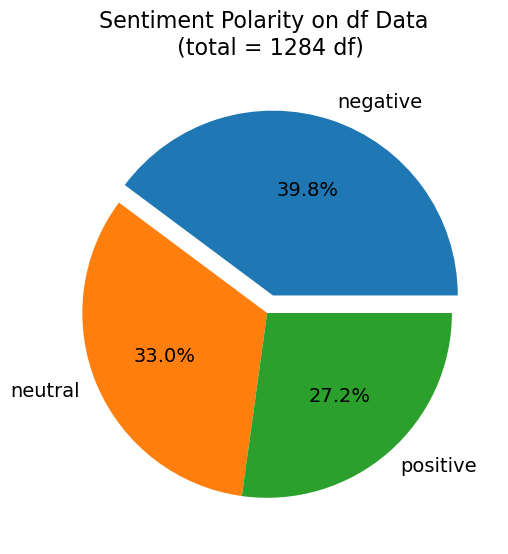

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in df["polarity"].value_counts()]
labels = list(df["polarity"].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(
    x=sizes,
    labels=labels,
    autopct="%1.1f%%",
    explode=explode,
    textprops={"fontsize": 14},
)
ax.set_title("Sentiment Polarity on df Data \n (total = 1284 df)", fontsize=16, pad=20)
plt.show()

In [17]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words = []
    negative_words = []
    for word in text:
        score_pos = 0
        score_neg = 0
        if word in lexicon_positive:
            score_pos = lexicon_positive[word]
        if word in lexicon_negative:
            score_neg = lexicon_negative[word]

        if score_pos + score_neg > 0:
            positive_words.append(word)
        elif score_pos + score_neg < 0:
            negative_words.append(word)

    return positive_words, negative_words

NameError: name 'WordCloud' is not defined

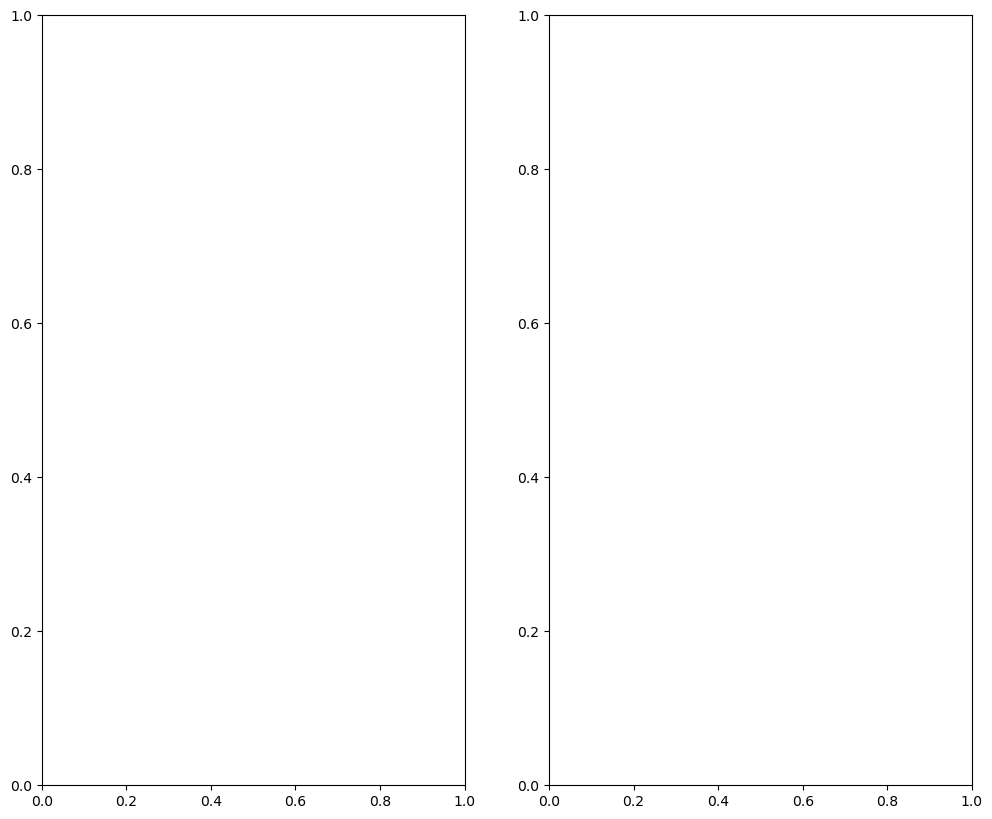

In [18]:
# Visualize positive and negative word cloud

sentiment_words = df["text_preprocessed"].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2, figsize=(12, 10))
list_words_postive = ""
for row_word in positive_words:
    for word in row_word:
        list_words_postive += " " + (word)
wordcloud_positive = WordCloud(
    width=800, height=600, background_color="black", colormap="Greens", min_font_size=10
).generate(list_words_postive)
ax[0].set_title(
    "Word Cloud of Positive Words on df Data \n (based on Indonesia Sentiment Lexicon)",
    fontsize=14,
)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis("off")

list_words_negative = ""
for row_word in negative_words:
    for word in row_word:
        list_words_negative += " " + (word)
wordcloud_negative = WordCloud(
    width=800, height=600, background_color="black", colormap="Reds", min_font_size=10
).generate(list_words_negative)
ax[1].set_title(
    "Word Cloud of Negative Words on df Data \n (based on Indonesia Sentiment Lexicon)",
    fontsize=14,
)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis("off")

plt.show()

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   created_at         103 non-null    object
 1   text_clean         103 non-null    object
 2   text_preprocessed  103 non-null    object
 3   polarity_score     103 non-null    int64 
 4   polarity           103 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [189]:
df.head()

,created_at,text_clean,text_preprocessed,polarity_score,polarity
0,9/30/2024 23:59,genshin impact versi hadir oktober 2024,"[genshin, impact, versi, hadir, oktober, 2024]",-1,negative
1,9/30/2024 23:58,hai pekan seni pasar mampir meja 41 iya freebi...,"[hai, pekan, seni, pasar, mampir, meja, 41, iy...",2,positive
2,9/30/2024 23:53,41 kesini iya,"[41, kesini, iya]",0,neutral
3,9/30/2024 23:52,diingetin meow meow cowokku isi,"[diingetin, meow, meow, cowokku, isi]",-3,negative
4,9/30/2024 23:50,sehat membangun tanda c0 nder kah gomen egk me...,"[sehat, membangun, tanda, c0, nder, kah, gomen...",-2,negative


In [190]:
df.to_csv('hasil_sentimen_genshin.csv')
df

,created_at,text_clean,text_preprocessed,polarity_score,polarity
0,9/30/2024 23:59,genshin impact versi hadir oktober 2024,"[genshin, impact, versi, hadir, oktober, 2024]",-1,negative
1,9/30/2024 23:58,hai pekan seni pasar mampir meja 41 iya freebi...,"[hai, pekan, seni, pasar, mampir, meja, 41, iy...",2,positive
2,9/30/2024 23:53,41 kesini iya,"[41, kesini, iya]",0,neutral
3,9/30/2024 23:52,diingetin meow meow cowokku isi,"[diingetin, meow, meow, cowokku, isi]",-3,negative
4,9/30/2024 23:50,sehat membangun tanda c0 nder kah gomen egk me...,"[sehat, membangun, tanda, c0, nder, kah, gomen...",-2,negative
...,...,...,...,...,...
98,9/30/2024 16:55,lucuan bikin kira2 pet genshin,"[lucuan, bikin, kira2, pet, genshin]",0,neutral
99,9/30/2024 16:54,ingame terima ueueueueue,"[ingame, terima, ueueueueue]",2,positive
100,9/30/2024 16:51,yay xiaru xiao genshin selfship,"[yay, xiaru, xiao, genshin, selfship]",0,neutral
101,9/30/2024 16:51,login genshin ae claim kue,"[login, genshin, ae, claim, kue]",-3,negative
